<a href="https://colab.research.google.com/github/devjkcc/Automobile/blob/main/Visualizacao.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/Meu_Drive')

Drive already mounted at /content/Meu_Drive; to attempt to forcibly remount, call drive.mount("/content/Meu_Drive", force_remount=True).


In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
# Carregando o dataset que foi alterado previamente
aut = pd.read_csv('/content/Meu_Drive/MyDrive/Colab Notebooks/automobile_new.csv', sep=',')

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
#Análise descritiva do preço
aut['price'].describe()

,price
count,205.000000
mean,13207.129353
std,7868.768212
min,5118.000000
25%,7788.000000
50%,10595.000000
75%,16500.000000
max,45400.000000


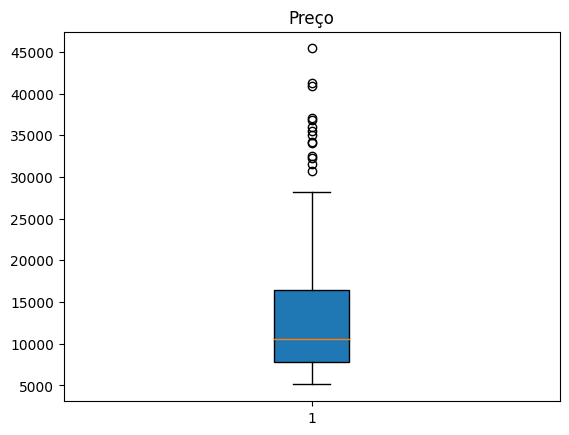

In [ ]:
# Com esse gráfico percebemos que há outliers, ou seja valores discrepantes
# A mediana está  aproximadamente a 10.000. Enquanto o valor máximo é de 45.000.
bplot1 = plt.boxplot(aut['price'], vert=True, patch_artist=True)
plt.title("Preço");


<ipython-input-9-25668e1e9b44>:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(aut['price'])


<Axes: xlabel='price', ylabel='Density'>

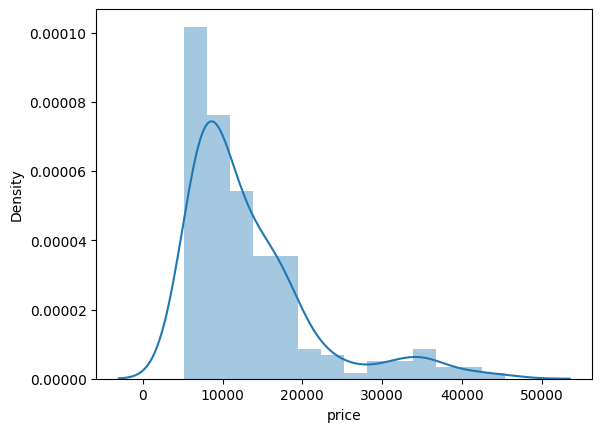

In [ ]:
# A partir desse gráfico, percebemos que a distribuição não é simétrica. O que contribui para a conclusão obtida a partir do box plot
sns.distplot(aut['price'])

In [ ]:
aut.tail()

,symboling,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,length,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
200,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,23,28,16845.0
201,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,8.7,160.0,5300.0,19,25,19045.0
202,-1,volvo,gas,std,four,sedan,rwd,front,109.1,188.8,...,173,mpfi,3.58,2.87,8.8,134.0,5500.0,18,23,21485.0
203,-1,volvo,diesel,turbo,four,sedan,rwd,front,109.1,188.8,...,145,idi,3.01,3.40,23.0,106.0,4800.0,26,27,22470.0
204,-1,volvo,gas,turbo,four,sedan,rwd,front,109.1,188.8,...,141,mpfi,3.78,3.15,9.5,114.0,5400.0,19,25,22625.0


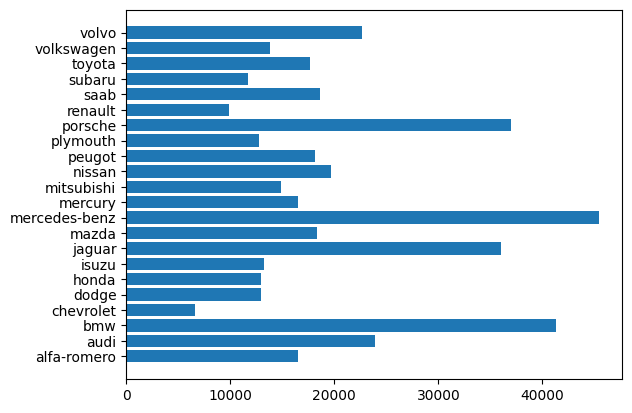

In [ ]:
# Logo, vemos que a marca mais cara é mercedes-benz e a mais barata chevrolet
bar1=plt.barh(aut['make'], aut['price'])

In [ ]:
contagem = aut['fuel-type'].value_counts()
contagem
rotulos =['gas', 'diesel']
fatia=[0,0.2]


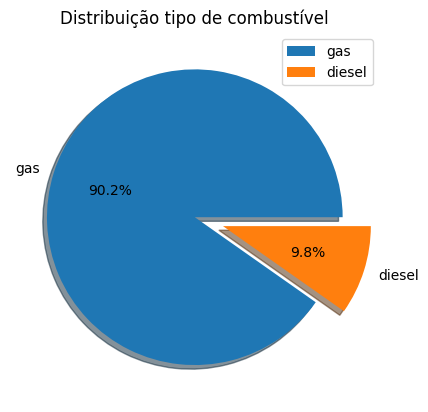

In [ ]:
#Percebemos então que a maior parte dos carros é gasolina
circle1 = plt.pie(contagem, labels=rotulos, autopct='%1.1f%%',explode=fatia, shadow=True)
plt.title("Distribuição tipo de combustível")
plt.legend()

In [ ]:
aut2 = aut[['make', 'horsepower', 'compression-ratio', 'price', 'engine-size']]

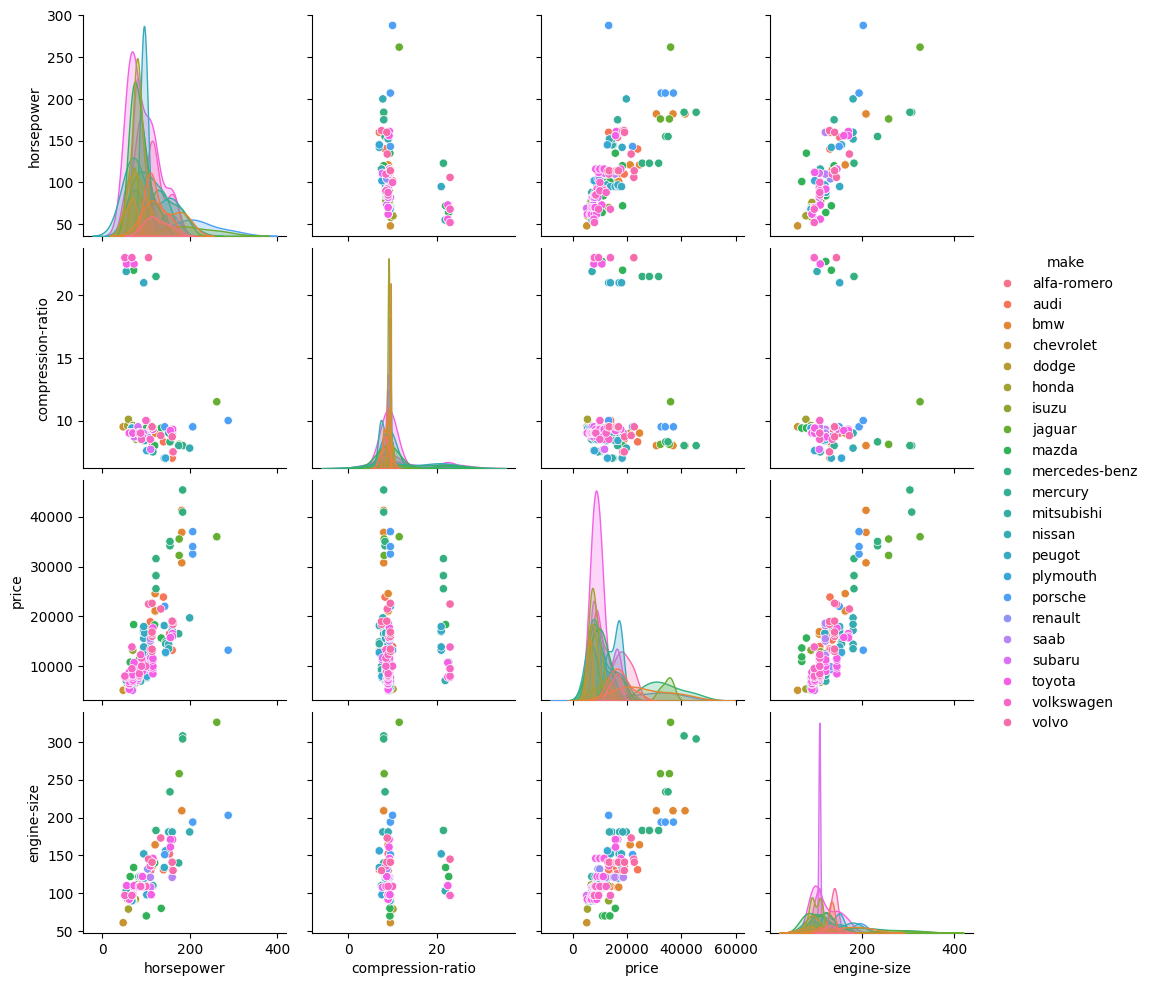

In [ ]:
sns.pairplot(aut2, hue='make')

In [ ]:
aut3 = aut[['horsepower', 'compression-ratio', 'price', 'engine-size', 'aspiration']]

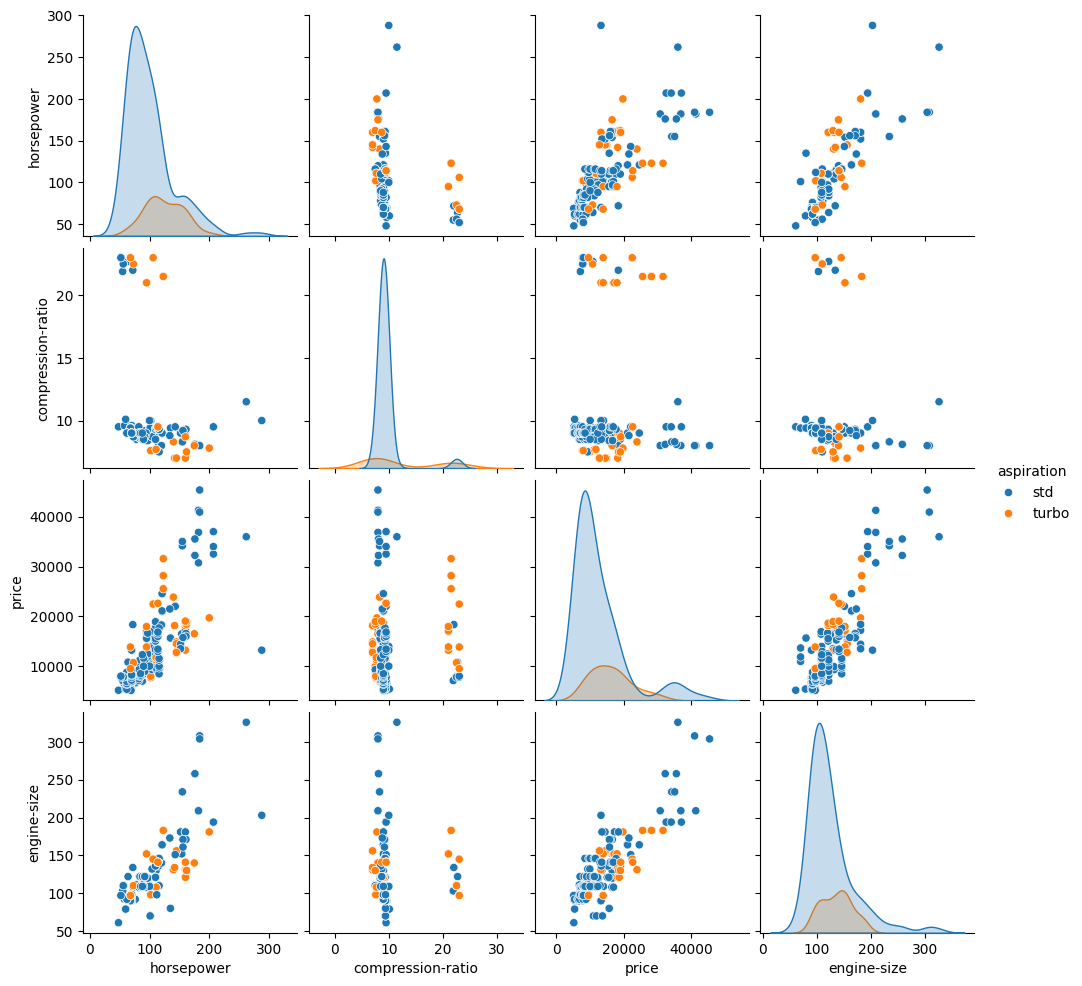

In [ ]:
sns.pairplot(aut3, hue='aspiration')

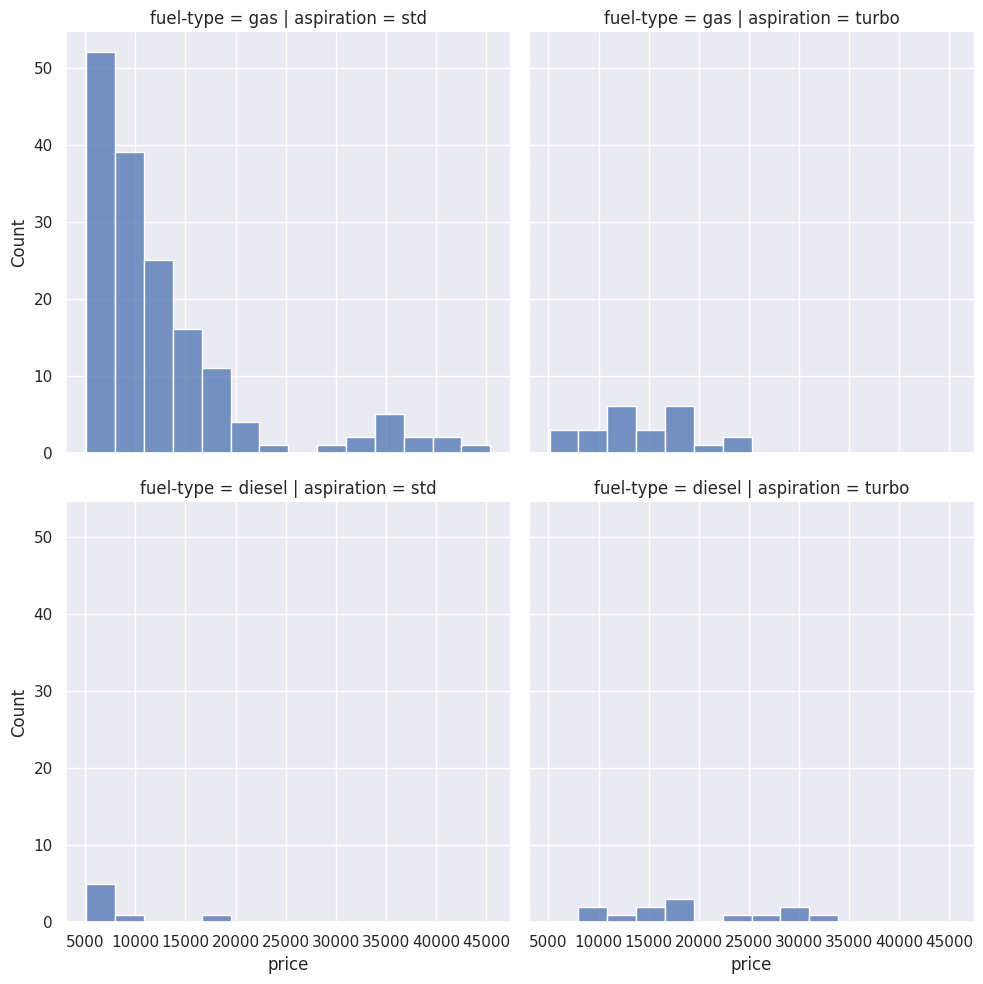

In [ ]:
# A partir desse gráfico, vemos que a curva de carros com gasolina e std representam mais carros em faixa de preço menor
# Já carros a diesel e turbo representam faixas distruibuidas e uma razoável concentração com preços mais caros.
sns.set_theme(style='darkgrid')
sns.displot(
    aut, x='price', col='aspiration', row='fuel-type'
)

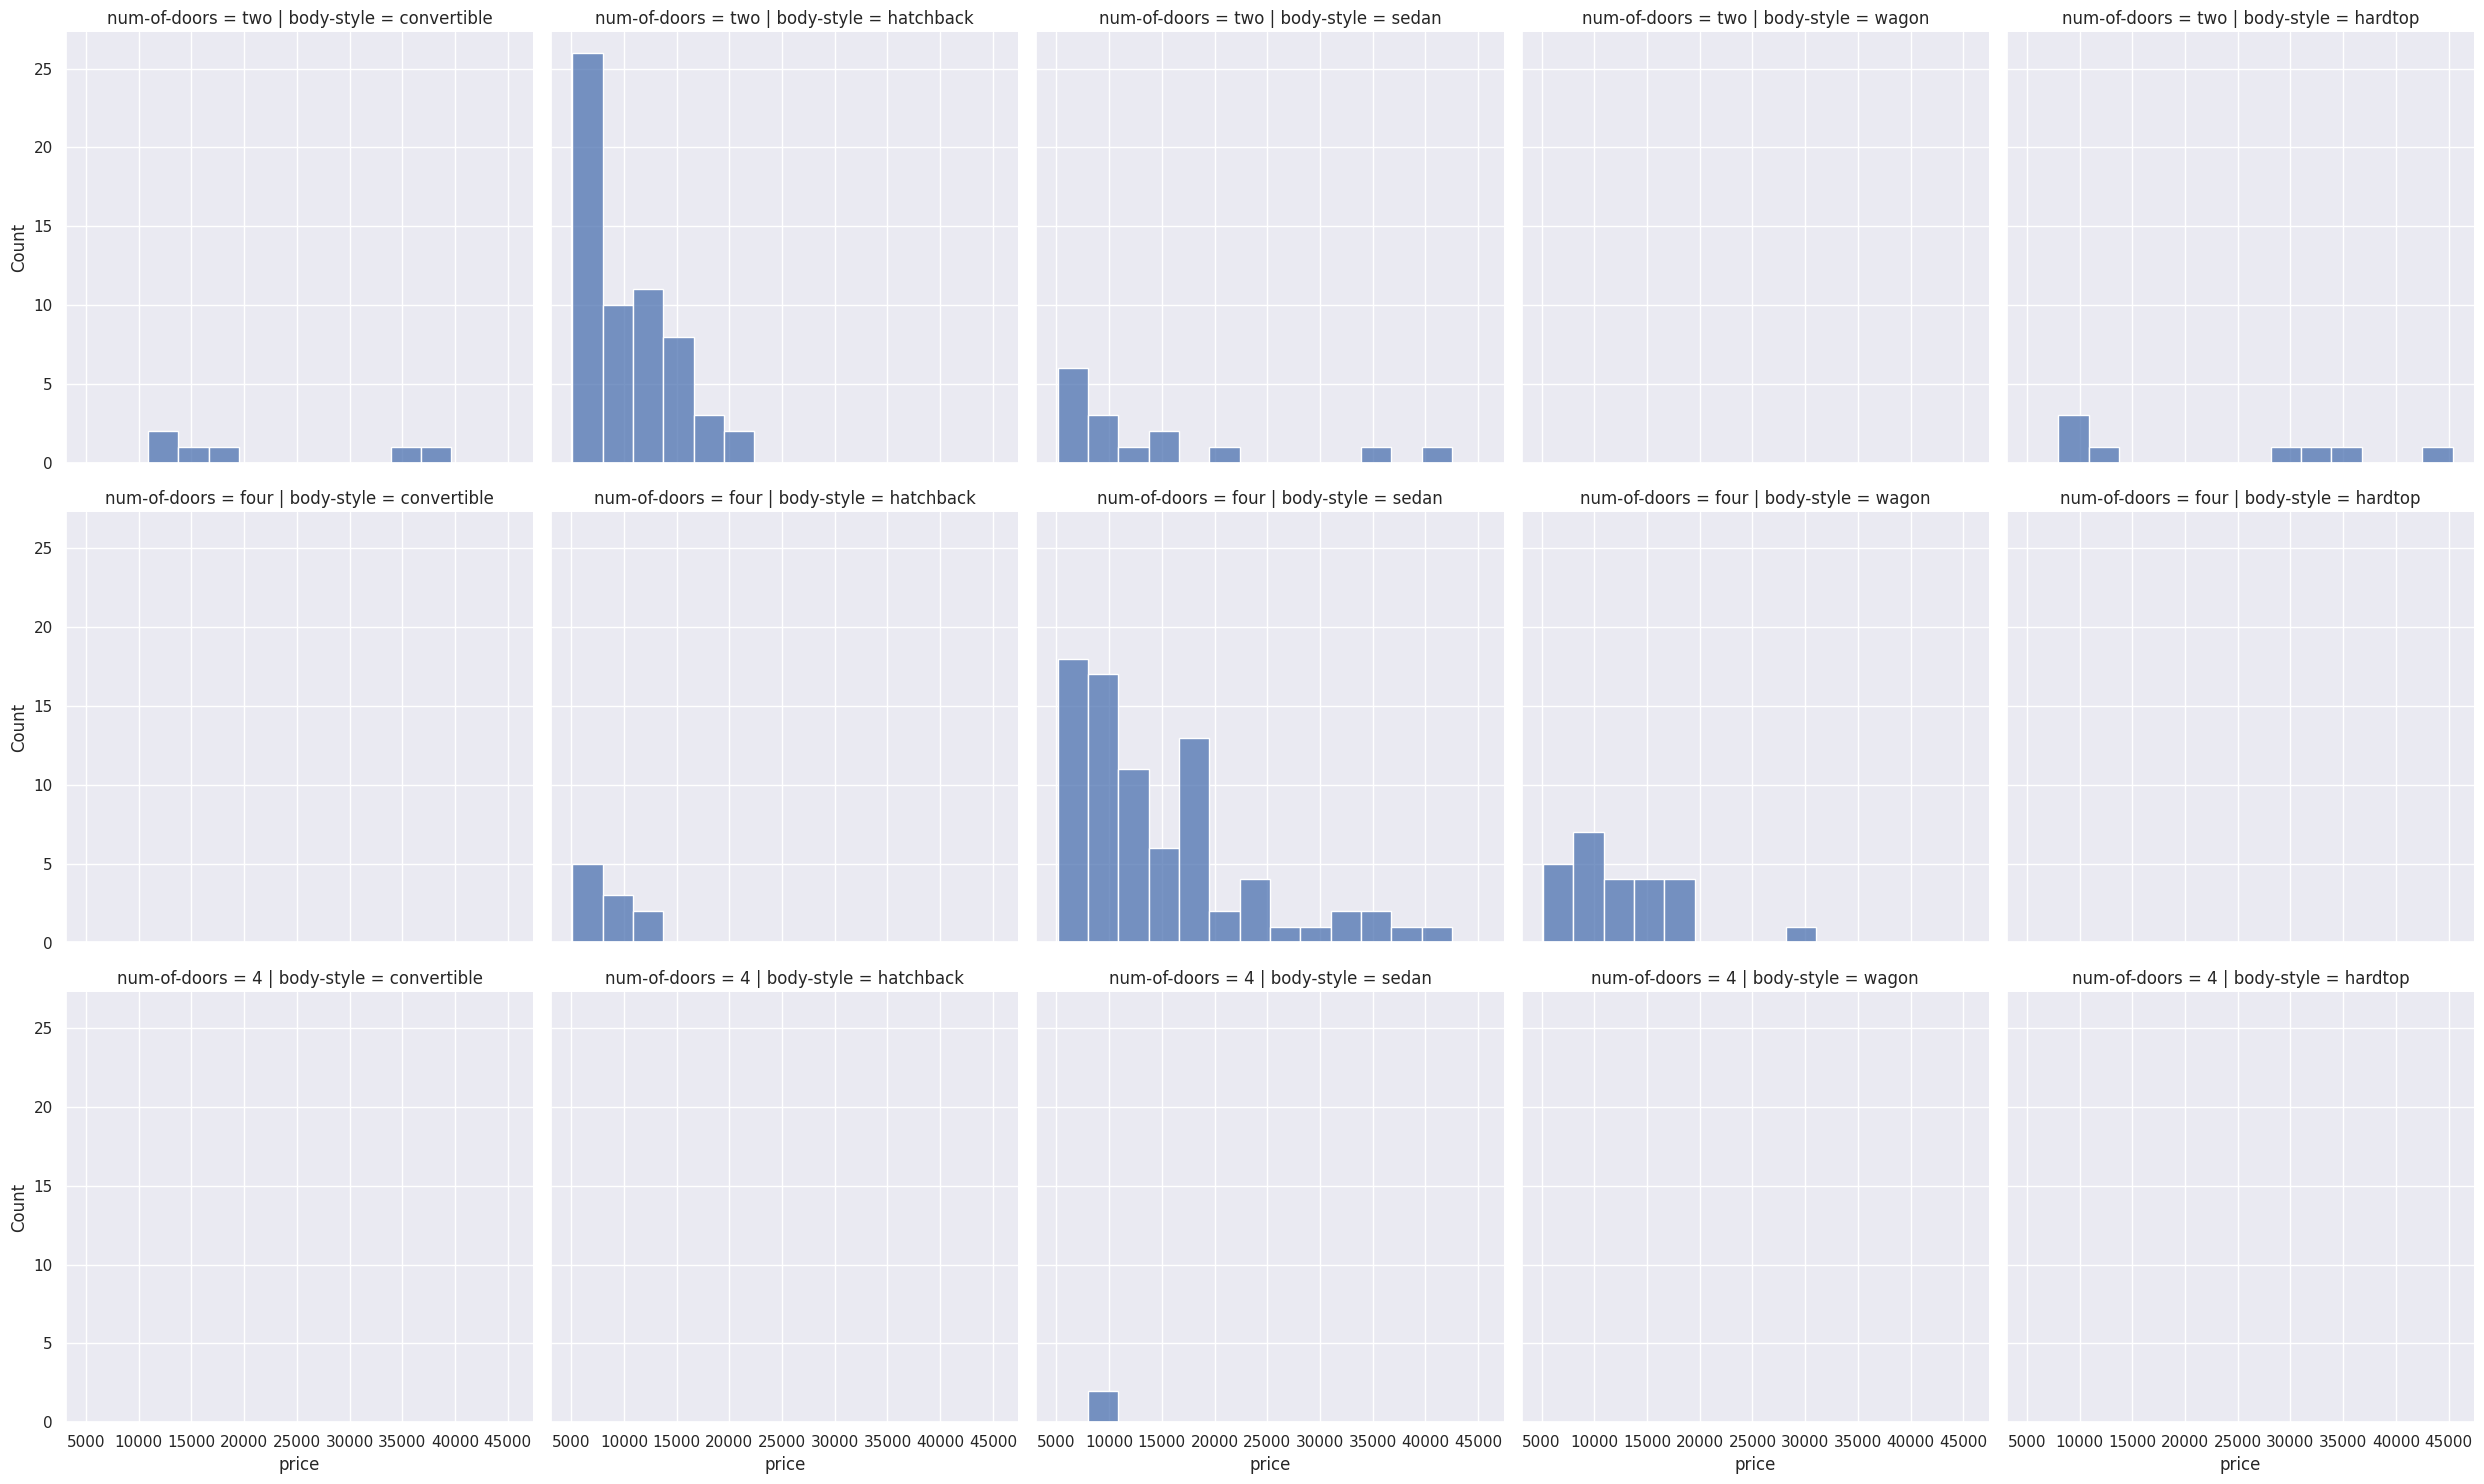

In [ ]:
# Os carros mais baratos são de dois lugares de estilo hatch, e quatro lugares de estilo sedan
#Enquanto os carros mais caros são de dois lugares e estilo hartop
sns.set_theme(style='darkgrid')
sns.displot(
    aut, x='price', col='body-style', row='num-of-doors'
)

In [ ]:
# Obtendo colunas númericas
# Esse metodo foi feito para criar uma coluna com valores object
# Isso foi feito para que fosse exibida um dataframe apenas com valores n
colunas_object = aut.select_dtypes(include = ['object']).columns

In [ ]:
# Excluindo a coluna que contém os valores objects
aut4= aut.drop(colunas_object, axis=1)

In [ ]:
#Provando que sobraram apenas valores númericos
aut4.dtypes

,0
symboling,int64
wheel-base,float64
length,float64
width,float64
height,float64
curb-weight,int64
engine-size,int64
bore,float64
stroke,float64
compression-ratio,float64


In [ ]:
# Calculando correlação
# A correlação é um ótimo metódo para verificar o quanto as variáveis se explicam
correl = aut4.corr()

<Axes: >

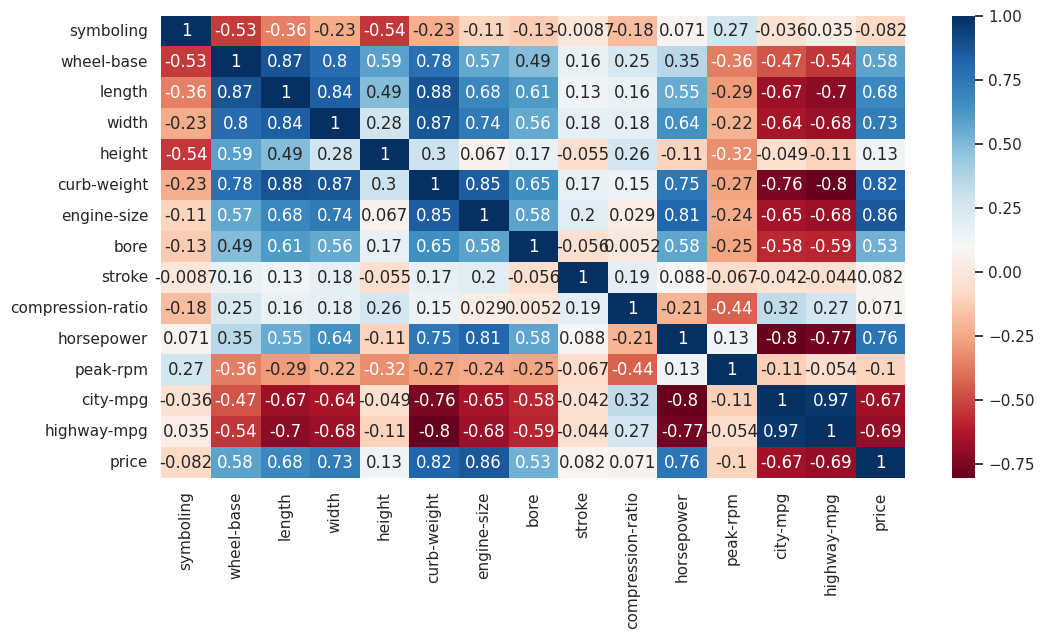

In [ ]:
# Criando o heatmap para nos mostrar as correlações entre as variáveis
# Nesse gráfico percebemos que as principais correlaçõe de preço são: horsepower, engine-size, curb-weight, width e length
plt.figure(figsize=(12,6))
sns.heatmap(correl, cmap='RdBu', annot=True)

In [ ]:
aut4.to_csv('automobileNew.csv')